### 回帰分析の考え方
#### 回帰=予測
**回帰**とは、興味ある変数$y$の値を、他の変数$x$を用いて予測することを意味する。
このとき、$x$を**説明変数(独立変数)**、$y$を**被説明変数(従属変数)**と呼ぶ。
$x$を用いて予測された$y$の値を$x$の関数として$m(x)$などと書き、これを**回帰関数**という。
予測の誤差$\varepsilon=y-m(x)$を誤差項と呼ぶ。
#### 最小二乗法
予測の精度を上げるためには、予測誤差を小さくする必要がある。
予測の正確さの基準として、平均二乗誤差(MSE)を次のように定義する。
$$
MSE=\frac{1}{n}(\varepsilon_1^2+\cdots+\varepsilon_n^2)=\frac{1}{n}\sum_{i=1}^n(y_i-y^*)^2
$$
この平均二乗誤差を最小化することで回帰関数を得る手法を**最小二乗法**と呼ぶ。

平均二乗誤差を展開。整理すると
$$
\begin{align}
MSE&=\frac{1}{n}\sum_{i=1}^ny_i^2-2y^*・\sum_{i=1}^ny_i+(y^*)^2\\
&=\bigl(\frac{1}{n}\sum_{i=1}^ny_i-y^* \bigr)^2+\frac{1}{n}\sum_{i=1}^ny_iy_i^2-\bigl(\frac{1}{n}\sum_{i=1}^ny_i \bigr)^2
\end{align}
$$

が得られる。
$y^*=\frac{1}{n}\sum_{i=1}^ny_i$であるとき、平均二乗誤差が最小となる。

以上を整理すれば、

1. 母集団から、各個人の$x$と$y$をペアにした標本を抽出する
2. 得られた標本を、$x$の値に応じて複数のグループに分割する
3. 各グループ内で$y$の平均値$y^*$を計算し、その結果を$m(x)$とする

このような回帰分析の方法を、**ノンパラメトリック回帰**と呼ぶ。

#### 条件付期待値と回帰分析
「$y$を$x$に回帰する」とは、$x$の値が与えられたときの$y$の条件付期待値$E(y|x)$を求めることである。
回帰関数$m(x)$が条件付期待値$E(y|x)$と等しいとき、誤差項$\varepsilon$は

$$
\varepsilon=y-E(y|x)
$$

と書ける。上式の期待値をとれば、誤差項の期待値が0となることが分かる。

#### 数値例

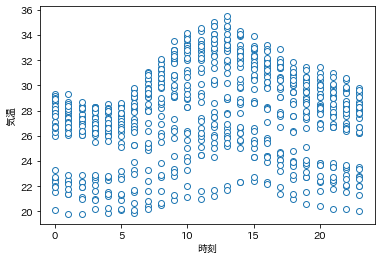

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

data = pd.read_csv('C:/Users/tanak/study/参考書/Rによる実証分析/R_EmpiricalAnalysis/02 演習用データ集/data_4_1.csv')
plt.plot(data.time, data.temp, 'o', mfc='white')
plt.xlabel('時刻');
plt.ylabel('気温');

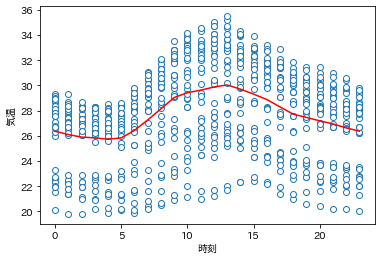

In [19]:
import numpy as np

mx = np.zeros(24)

for i in range(24):
    group = data.query('time == @i')
    mx[i] = group['temp'].mean()

plt.plot(data.time, data.temp, 'o', mfc='white')
plt.plot(mx, 'r')
plt.xlabel('時刻');
plt.ylabel('気温');

### 単回帰分析
#### ノンパラメトリック回帰の限界
説明変数$x$に多くの項目が含まれる場合、同一の$x$からなる各グループは必然的に小さくなる。このような場合には、得られた予測値はあまり信頼できるものではない。このような場合はノンパラメトリック回帰は使用できない。
$x$と$y$の間に何らかの関係が事前に想定される場合にも、ノンパラメトリック回帰は最善の方法ではない。

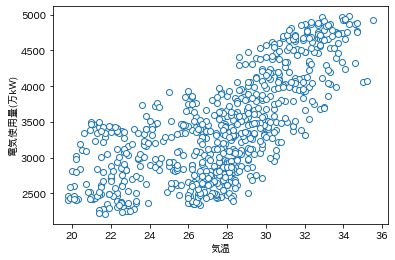

In [21]:
plt.plot(data.temp, data.elec, 'o', mfc='white')
plt.xlabel('気温');
plt.ylabel('電気使用量(万kW)');

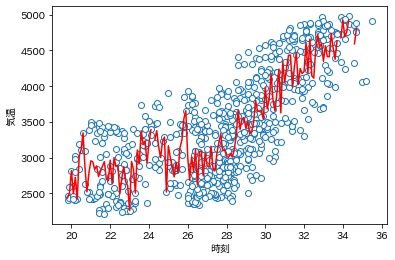

In [41]:
temp = np.round(np.arange(np.min(data.temp), np.max(data.temp)+0.1, 0.1),1)
mx = np.zeros(len(temp))

for i, t in enumerate(temp):
    group = data.query('temp == @t')
    mx[i] = group['elec'].mean()

plt.plot(data.temp, data.elec, 'o', mfc='white')
plt.plot(temp, mx, 'r')
plt.xlabel('気温');
plt.ylabel('電気使用量(万kW)');

たとえば、「気温が1度上昇すると、電力使用量がどれだけ増加するか」などの事実を正確に読み取ることはできない。
また、回帰曲線はギザギザとなり全体の傾向が見づらいものとなっている。

#### 線形回帰の仮定
以上のような問題に対応する1つの方法は、回帰関数に何らかの関数系を仮定することである。
電力使用量は気温の1次式であるとして、
$$
elec=\beta_0+\beta_1 temp + \varepsilon
$$

という回帰モデルを仮定する。
この関係式のことを**回帰式**、係数$(\beta_0,\beta_1)$を**回帰係数**と呼ぶ。
このように、説明変数と被説明変数の間に1次式の関係を仮定する方法を**線形回帰**と呼ぶ。
今回の場合、説明変数が1種類しかないので、**単回帰モデル**とも呼ぶ。
複数の説明変数を仮定する場合には**重回帰モデル**と呼ぶ。

#### 単回帰の計算方法
母集団から無作為抽出された大きさ$n$の標本$\{(y_i,x_i):i=1,\cdots,n \}$が利用可能であるとする。
回帰関数の形には
$$
E(y|x)=\beta_0+\beta_1x
$$
という仮定をする。

この標本に基づく予測誤差は

$$
\varepsilon_1=y_1-(\beta_0+\beta_1x_1),\hspace{5mm} \varepsilon_2=y_2-(\beta_0+\beta_2x_2),\hspace{5mm}\cdots,\hspace{5mm}\varepsilon_n=y_n-(\beta_0+\beta_nx_n)
$$

によって計算され、平均二乗誤差は、
$$
MSE=\frac{1}{n}\sum_{i=1}^n(y_i-\beta_0-\beta_ix_i)^2
$$

となる。
この誤差を最小にする係数の値$(\hat{\beta}_0,\hat{\beta}_1)$を、**最小二乗推定量**、あるいは**OLS推定量**と呼ぶ。

平均二乗誤差を係数$(\beta_0,\beta_1)$によって微分し、その結果を0と置くことで得られる。
$$
\frac{\partial MSE}{\partial \beta_0}=-\frac{2}{n}\sum_{i=1}^n(y_i-\beta_0-\beta_ix_i)=0\\
\frac{\partial MSE}{\partial \beta_1}=-\frac{2}{n}\sum_{i=1}^n(y_i-\beta_0-\beta_ix_i)x_i=0
$$

として、これを解くことにより、

$$
\hat{\beta}_1=\frac{\sum_{i=1}^n(x_i-\bar{x}_n)(y_i-\bar{y}_n)}{\sum_{i=1}^n(x_i-\bar{x}_n)^2}
$$

ここで、$\bar{x}_n$は$x$の標本平均、$\bar{y}_n$は$y$の標本平均である。
分母・分子を$n-1$で割ってみると、
$$
\hat{\beta}_1=\frac{xとyの標本共分散}{xの標本分散}
$$
であることが分かる。


In [68]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
lm1.fit(data[['temp']], data['elec'])

print('係数: ', lm1.coef_)
print('切片: ', lm1.intercept_)

係数:  [145.03031295]
切片:  -614.2721790534642


電力使用量の予測値は
$$
elec = -614.3 + 145.0×temp
$$

によって計算されることになる。
気温が1度上昇すれば電気使用量が1時間当たり145万kW増加することがわかる。

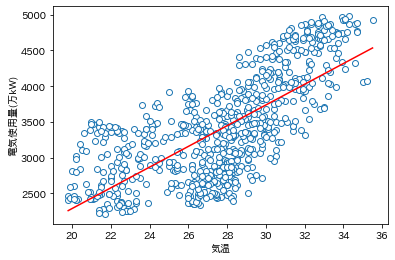

In [70]:
pred1 = lm1.predict(temp.reshape(-1, 1))

plt.plot(data.temp, data.elec, 'o', mfc='white')
plt.plot(temp, pred1, 'r')
plt.xlabel('気温');
plt.ylabel('電気使用量(万kW)');

ここで、**推定量**とは、推定の結果を、標本$\{(y_i,x_i):i=1,\cdots,n \}$の関数として表現したものであり、
**推定値**は、実際に標本を代入して計算した結果の数値である。

### 重回帰分析
#### 説明変数の追加

電力使用量の時間変化を見ると、日中から夕方までは電力使用量が多く、夜間から早朝には少なくなる傾向があることがわかる。

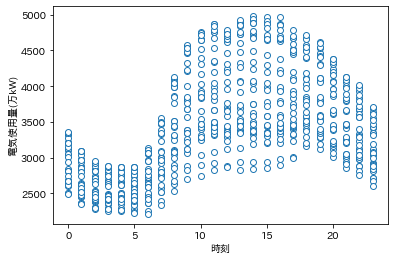

In [58]:
plt.plot(data.time, data.elec, 'o', mfc='white')
plt.xlabel('時刻');
plt.ylabel('電気使用量(万kW)');

時間が昼であることを示すダミー変数を考えて、以下のような回帰モデルを仮定する。
$$
elec = \beta_0+\beta_1 temp + \beta_2 daytime+\varepsilon
$$

このように2つ以上の説明変数を用いて予測を行う方法を**重回帰分析**という。

In [60]:
daytime = (data.time >= 9)&(data.time <= 18)

0      False
1      False
2      False
3      False
4      False
       ...  
739    False
740    False
741    False
742    False
743    False
Name: time, Length: 744, dtype: bool

#### 重回帰分析とは
説明変数$x$は$d(\geq 2)$個の項目からなっており、$x=(x_1,x_2,\cdots,x_d)$というベクトルとして表現される。
回帰関数には
$$
E(y|x)=\beta_0+\beta_1x_1+\cdots+\beta_dx_d
$$
という線形構造が仮定される。
平均二乗誤差は、
$$
MSE=\frac{1}{n}\sum_{i=1}^n(y_i-\beta_0-\beta_1x_{1i}-\cdots\beta_dx_{di})^2
$$
となり、これを最小化する$(\beta_0,\cdots,\beta_d)$を見つけることが目的となる。

In [71]:
data['daytime'] = daytime

lm2 = LinearRegression()
lm2.fit(data[['temp','daytime']], data['elec'])

print('係数: ', lm2.coef_)
print('切片: ', lm2.intercept_)

係数:  [116.97824457 555.44241579]
切片:  -69.55027797301864


電気使用量の予測値は
$$
elec = -69.55+116.98×temp + 555.44×daytime
$$
によって計算されることとなる。

### 決定係数と回帰分析
#### 決定係数
重回帰分析のデータへのあてはまりの良さは、次のよって定義される**決定係数**$R^2$の大きさによって評価される。
$$
R^2=1-\frac{\sum_{i=1}^n\hat{e}_i^2}{\sum_{i=1}^ny_i^2}
$$
ここで、$\hat{e}_i$は**残差**と呼ばれる値であり、
$$
\hat{e}_i=y_i-(\hat{\beta}_0+\hat{\beta}_1x_{1i}+\cdots+\hat{\beta}_dx_{di}), i=1,\cdots,n
$$
によって計算される。
決定係数は、
$$
R^2=\frac{\sum_{i=1}^ny_i^2 - \sum_{i=1}^n\hat{e}_i^2}{\sum_{i=1}^ny_i^2}
$$
となる。
分母は、被説明変数$y$の変動量を意味する。
分子は、$y$の変動のうち、回帰分析によって予測できた変動量に相当する。
決定係数が1であれば、回帰分析によって$y$の変動を100%予測できていることになる。

In [79]:
from sklearn.metrics import r2_score

pred1 = lm1.predict(data[['temp']])
pred2 = lm2.predict(data[['temp','daytime']])

print(r2_score(data.elec, pred1))
print(r2_score(data.elec, pred2))

0.5181380561977577
0.6459006636599551


単回帰モデルの決定係数は0.518、重回帰モデルの決定係数は0.646となり、予測力が0.13増加したことになる。

#### 決定係数はモデルの正しさを保証しない
決定係数には「説明変数を追加すれば、それが何であれ決定係数の値は必ず上昇する」という性質がある。
したがって、決定係数の大小によって「モデルの設定の正しさ」を判断することは無意味である。